In [3]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 2.5.1+cu121  Device: cuda


# Генерация набора данных

### Символы

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/AIM_WORK/Lab3/data.zip', 'r') as zips:
    zips.extractall(path="data/")

In [6]:
import os
path_to_folder = './data' # путь к папке с данными
name_folders = [x[0].split('/')[-1] for x in os.walk(path_to_folder) if x[0].split('/')[-1] != 'times']


In [7]:
name_folders = name_folders[1:]

In [8]:
print(name_folders)

['(', '+', 'y', '9', '2', '5', '3', '7', '8', '1', ',', '1', ')', 't', 'h', 'X', '6', '-', '4', '0', 'w']


In [9]:
len(name_folders)

21

### Генератор произвольной последовательности символов

In [10]:
import random as rd

def use_symbols_sequence_generator(symbols, min_sequence_len, max_sequence_len):
    sequence_len = rd.randint(min_sequence_len, max_sequence_len + 1)
    sequence = "".join(rd.choices(symbols, k=sequence_len))
    return sequence


### Набор текстовых строк

In [11]:
symbols_sequences = []

for i in range(20):
    symbols_sequences.append(use_symbols_sequence_generator(name_folders, 5, 20))

symbols_sequences

['8)w1,8,,58hw8(',
 ')28,5++h32,66244',
 '1yww20w-t+t9287yw',
 '(,0(72)t2h14t',
 ',13,t7',
 'w4t(+',
 '(t5h-)81t)t)y171',
 '5657223-,9,,-h',
 '0hh+h)2-3)ww729)8+',
 '+11+901+yh183w80h)',
 '3952(97-wy6y',
 '1-+7432Xh)40t,196)2+t',
 '10hw-h+y9,89)73httw',
 '0-()yh),w06y)',
 '84835)-(4831y96',
 '67885,6-wy77-008y',
 '727,139t32yh2',
 '8640,3w(t27w)55,3',
 '763X)+5105956+h2-4',
 '881743-(++,-+']

### Сопоставление строк с массивами изображений

In [12]:
sequences_images = dict()

for sequence in symbols_sequences:
    sequence_images = []
    for symbol in sequence:
        file_name = rd.choice(os.listdir(os.path.join(path_to_folder, symbol)))
        sequence_images.append(os.path.join(path_to_folder, symbol, file_name))
    sequences_images[sequence] = sequence_images
sequences_images

{'8)w1,8,,58hw8(': ['./data/8/exp9710.jpg',
  './data/)/exp81465.jpg',
  './data/w/exp83868.jpg',
  './data/1/1_40779.jpg',
  './data/,/,_104596.jpg',
  './data/8/exp74836.jpg',
  './data/,/,_62208.jpg',
  './data/,/,_54606.jpg',
  './data/5/5_58522.jpg',
  './data/8/8_87753.jpg',
  './data/h/exp40441.jpg',
  './data/w/exp72174.jpg',
  './data/8/8_44037.jpg',
  './data/(/(_41273.jpg'],
 ')28,5++h32,66244': ['./data/)/exp77343.jpg',
  './data/2/exp29830.jpg',
  './data/8/8_40293.jpg',
  './data/,/,_57084.jpg',
  './data/5/5_103239.jpg',
  './data/+/exp102408.jpg',
  './data/+/exp14243.jpg',
  './data/h/exp77715.jpg',
  './data/3/exp64416.jpg',
  './data/2/2_83542.jpg',
  './data/,/exp34535.jpg',
  './data/6/exp855.jpg',
  './data/6/exp41906.jpg',
  './data/2/exp25229.jpg',
  './data/4/exp20405.jpg',
  './data/4/4_28844.jpg'],
 '1yww20w-t+t9287yw': ['./data/1/exp42088.jpg',
  './data/y/exp71826.jpg',
  './data/w/exp85786.jpg',
  './data/w/exp54585.jpg',
  './data/2/2_46704.jpg',
  './dat

In [13]:
from PIL import Image

IMAGE_SIZE = 45

def images_char_to_image_str(list_of_images):
    margin = 20
    image = Image.new("RGB", (len(list_of_images) * (IMAGE_SIZE + margin), IMAGE_SIZE * 2), (255, 255, 255))

    for k, image_ in enumerate(list_of_images):
        image.paste(image_, (k * (IMAGE_SIZE + margin), IMAGE_SIZE // 2))

    return image

In [14]:
sequence_img_pil = dict()
for key, imges in sequences_images.items():
    img_list = []
    for p in imges:
        img_list.append(Image.open(p).convert("RGB"))
    sequence_img_pil[key] = img_list
sequence_img_pil

{'8)w1,8,,58hw8(': [<PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>],
 ')28,5++h32,66244': [<PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image image mode=RGB size=45x45>,
  <PIL.Image.Image im

8)w1,8,,58hw8(


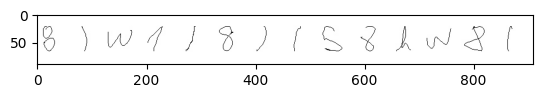

)28,5++h32,66244


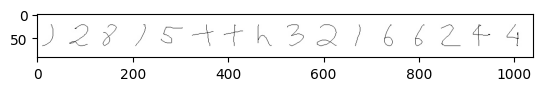

1yww20w-t+t9287yw


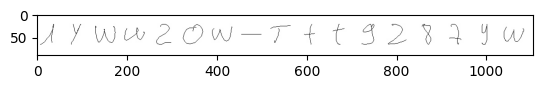

(,0(72)t2h14t


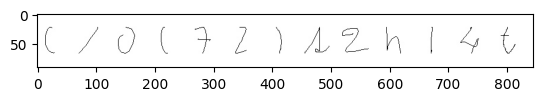

,13,t7


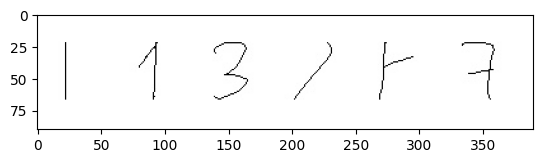

w4t(+


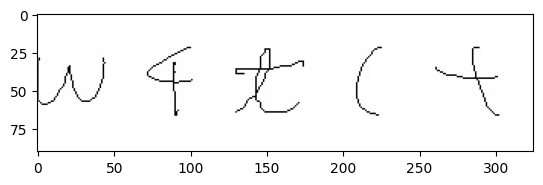

(t5h-)81t)t)y171


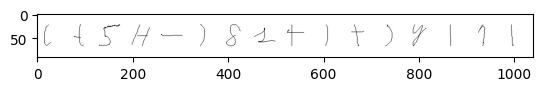

5657223-,9,,-h


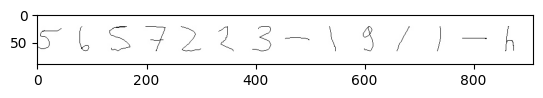

0hh+h)2-3)ww729)8+


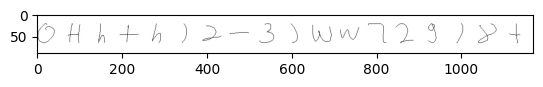

+11+901+yh183w80h)


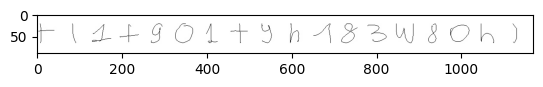

3952(97-wy6y


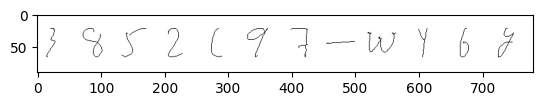

1-+7432Xh)40t,196)2+t


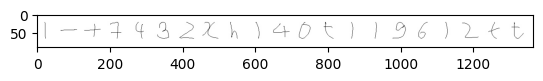

10hw-h+y9,89)73httw


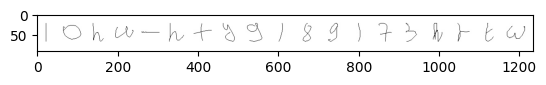

0-()yh),w06y)


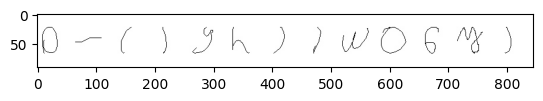

84835)-(4831y96


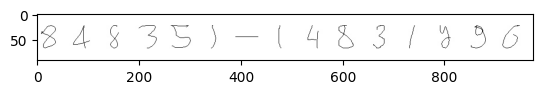

67885,6-wy77-008y


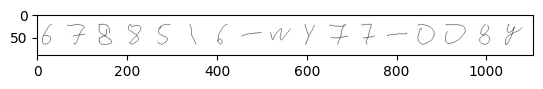

727,139t32yh2


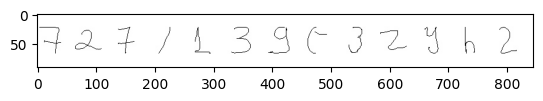

8640,3w(t27w)55,3


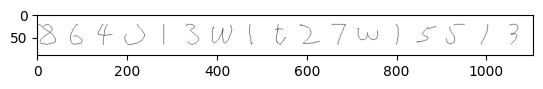

763X)+5105956+h2-4


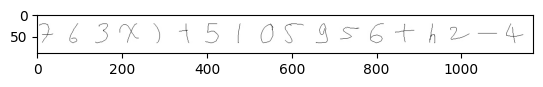

881743-(++,-+


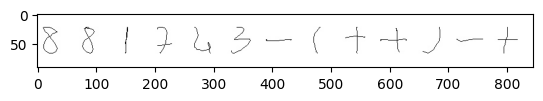

In [15]:
for key, value in sequence_img_pil.items():
    print(key)
    plt.imshow(images_char_to_image_str(value))
    plt.show()

# Классификация

### Предобработка изображений

In [16]:
import cv2
from PIL import ImageOps

def preprocess_img(image):

    # Предобработка и преобразование изображения в вектор

    # Конвертация в оттенки серого
    grayscale_image = image.convert("L")

    # Бинаризация
    threshold = 128
    binary_image = grayscale_image.point(lambda x: 255 if x > threshold else 0, '1')

    # Нормализация размера
    target_size = (IMAGE_SIZE, IMAGE_SIZE)  # Размер целевого изображения
    resized_image = ImageOps.fit(binary_image, target_size, method=Image.Resampling.LANCZOS)

    # Центрирование символа
    bbox = resized_image.getbbox()  # Определяем ограничивающий прямоугольник символа
    if bbox:
        symbol = resized_image.crop(bbox)
        padded_image = ImageOps.expand(symbol, border=(2, 2, 2, 2), fill=0)  # Добавляем отступы
        resized_image = ImageOps.fit(padded_image, target_size, method=Image.Resampling.LANCZOS)

    # Нормализация значений пикселей
    normalized_np = np.array(resized_image) / 255.0  # Нормализуем к диапазону [0, 1]

    # Превращение в вектор
    image_vector = normalized_np.flatten()

    return image_vector



### Сохранение данных и разделение на тестовую и обучающую выборку

In [22]:
X = []
y = []

for symbol in name_folders:

    # Загрузка изображений разных символов в датасет

    symbol_images = os.listdir(os.path.join(path_to_folder, symbol))

    for symbol_image in rd.sample(symbol_images, min(3000, len(symbol_images))):

        # Предобработка и преобразование изображения в вектор

        try:
            image = Image.open(os.path.join(path_to_folder, symbol, symbol_image)).convert("RGB")

            image = preprocess_img(image)

            X.append(image)
            y.append(symbol)
        except Exception:
            pass



In [23]:
print(y[0], *X[0])

( 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.0 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.00392156862745098 0.0039

In [24]:
print(len(y), len(X))

55462 55462


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### KNN с проверкой k = 1-5 с оценкой accuracy

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid_param = {'n_neighbors': range(1, 6)}
grid_model = GridSearchCV(estimator=knn, param_grid=grid_param, scoring='accuracy', cv=5)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 6)}, scoring='accuracy')

In [27]:
print(grid_model.best_params_)

{'n_neighbors': 1}


In [28]:
grid_y_pred = grid_model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

print(f"accuracy: {np.round(accuracy_score(grid_y_pred, y_test) * 100, 1)} %")

accuracy: 81.7 %


# Распознавание

### Распознавание изображений строковых последовательностей

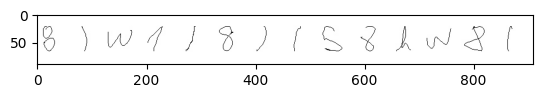

     orig. sequence      |      pred. sequence      |  acc 
     8)w1,8,,58hw8(      |      8)w1,8,,58hw8(      | 100.0




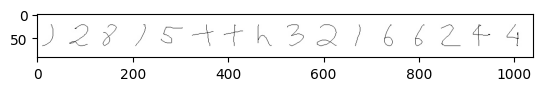

     orig. sequence      |      pred. sequence      |  acc 
    )28,5++h32,66244     |     ,28,5-+h12,66244     | 81.2 




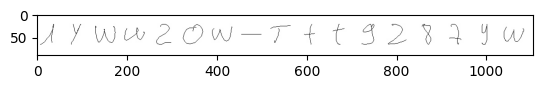

     orig. sequence      |      pred. sequence      |  acc 
   1yww20w-t+t9287yw     |    1yww11w-t1t9287+w     | 76.5 




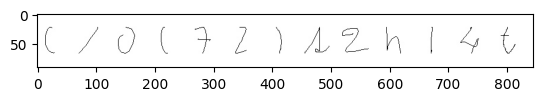

     orig. sequence      |      pred. sequence      |  acc 
     (,0(72)t2h14t       |      (,0(72)t2h14t       | 100.0




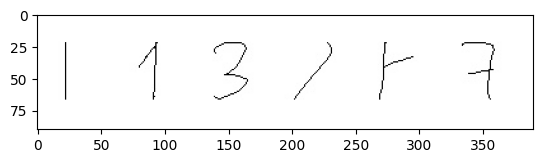

     orig. sequence      |      pred. sequence      |  acc 
         ,13,t7          |          113,t7          | 83.3 




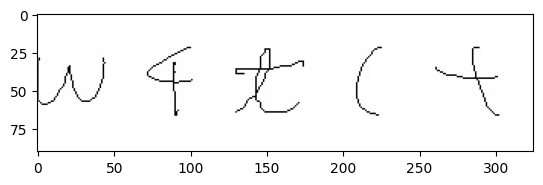

     orig. sequence      |      pred. sequence      |  acc 
         w4t(+           |          w+t(-           | 60.0 




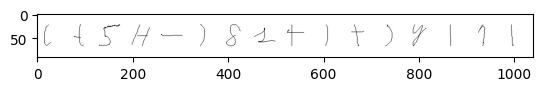

     orig. sequence      |      pred. sequence      |  acc 
    (t5h-)81t)t)y171     |     (t5h-)81t)t)y,71     | 93.8 




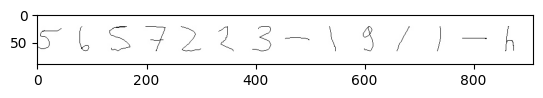

     orig. sequence      |      pred. sequence      |  acc 
     5657223-,9,,-h      |      565721t-,9,,-h      | 85.7 




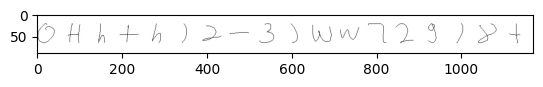

     orig. sequence      |      pred. sequence      |  acc 
   0hh+h)2-3)ww729)8+    |    0hh+h)(-3)ww7)))8+    | 83.3 




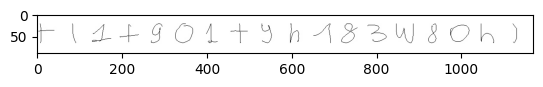

     orig. sequence      |      pred. sequence      |  acc 
   +11+901+yh183w80h)    |    +111)01+yh18-w80h)    | 83.3 




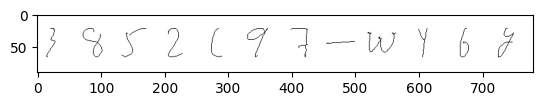

     orig. sequence      |      pred. sequence      |  acc 
      3952(97-wy6y       |       ,952(97-wy6y       | 91.7 




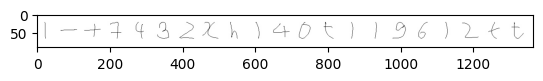

     orig. sequence      |      pred. sequence      |  acc 
 1-+7432Xh)40t,196)2+t   |  1--7432Xh)40t,136)2(t   | 85.7 




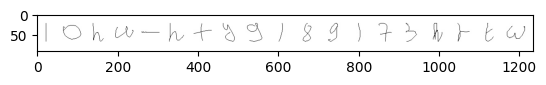

     orig. sequence      |      pred. sequence      |  acc 
  10hw-h+y9,89)73httw    |   10hw-h-yt,89)73httw    | 89.5 




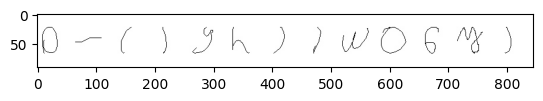

     orig. sequence      |      pred. sequence      |  acc 
     0-()yh),w06y)       |      0-()yh),w06y)       | 100.0




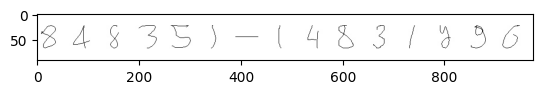

     orig. sequence      |      pred. sequence      |  acc 
    84835)-(4831y96      |     84835)-14831y96      | 93.3 




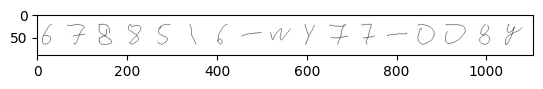

     orig. sequence      |      pred. sequence      |  acc 
   67885,6-wy77-008y     |    67885,6-wy77-008,     | 94.1 




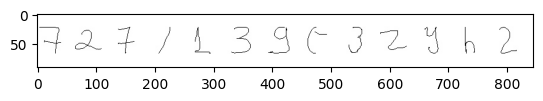

     orig. sequence      |      pred. sequence      |  acc 
     727,139t32yh2       |      7,7,139t1,yh2       | 76.9 




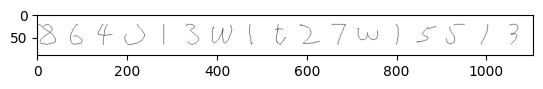

     orig. sequence      |      pred. sequence      |  acc 
   8640,3w(t27w)55,3     |    86401)w1t27w)55,3     | 82.4 




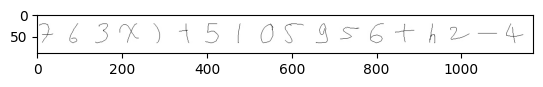

     orig. sequence      |      pred. sequence      |  acc 
   763X)+5105956+h2-4    |    763X)151059561h2-4    | 88.9 




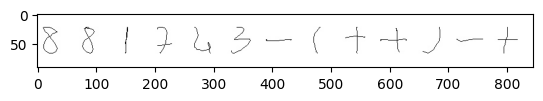

     orig. sequence      |      pred. sequence      |  acc 
     881743-(++,-+       |      881743-(1+,--       | 84.6 




In [30]:

accuracy_list = []
solution = dict()
for key, value in sequence_img_pil.items():

    # Вывод исходной последовательности изображений символов
    # и сравнение оригинальной последовательности симвоволов с распознаной,

    pil_image = images_char_to_image_str(sequence_img_pil[key])

    plt.imshow(np.array(pil_image))
    plt.show()

    secuence_vector = []

    # Распознавание
    for img in value:
        secuence_vector.append(preprocess_img(img))

    predicted = grid_model.predict(secuence_vector)
    accuracy = accuracy_score(predicted, list(key))

    acc = np.round(accuracy * 100, 1)
    str_pred = ''.join(predicted)

     # Оригинальная последовательность | распознаная | accuracy
    title1 = 'orig. sequence'
    title2 = 'pred. sequence'
    title3 = 'acc'
    title4 = 'CER'
    print(f'{title1:^24} | {title2:^24} | {title3:^5}', sep='')
    print(f'{key:^24} | {str_pred:^24} | {acc:^5}', sep='')
    print('\n')
    solution[key] = predicted
    accuracy_list.append(accuracy)



In [31]:
print(f"Mean accuracy on recognition set: {np.round(np.mean(accuracy_list) * 100, 1)} %")

Mean accuracy on recognition set: 86.7 %


### CER

#### Удаление и добавление символов

In [32]:
from copy import deepcopy

def str_random_change(list_str_):
    delete_str_ = [chr for chr in list_str_ if rd.random() > 0.1]
    modify_string = deepcopy(list_str_)
    for i in range(len(delete_str_)):
        if rd.random() < 0.1:
            rand_chr = rd.choice(name_folders)
            modify_string.insert(i, rand_chr)
    return modify_string

#### Расчет CER

In [33]:
def levenstein(str_1, str_2):

    # Расстояние Левенштейна для двух строк

    n, m = len(str_1), len(str_2)
    if n > m:
        str_1, str_2 = str_2, str_1
        n, m = m, n

    current_row = range(n + 1)
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if str_1[j - 1] != str_2[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

In [34]:
cer = 0
title1 = 'original'
title2 = 'changed predicted'
title3 = 'CER'
print(f'{title1:^24} | {title2:^24} | {title3:^5}\n')
for original, prediction in solution.items():

    prediction = list(prediction)
    changed_pred = ''.join(str_random_change(prediction))

    metric = levenstein(original, changed_pred) / len(original)
    cer += metric
    print(f'{original:^24} | {changed_pred:^24} | {np.round(metric, 2):^5}\n')

print(f"MEAN CER: {np.round(cer / len(solution), 2)}")

        original         |    changed predicted     |  CER 

     8)w1,8,,58hw8(      |     8)w1,8,-,58hw8(      | 0.07 

    )28,5++h32,66244     |    8,28,5-+h112,66244    | 0.31 

   1yww20w-t+t9287yw     |   1yww11-1w-tw1t9287+w   | 0.41 

     (,0(72)t2h14t       |      (,0(72)t2h14t       |  0.0 

         ,13,t7          |          113,t7          | 0.17 

         w4t(+           |          w+t6(-          |  0.6 

    (t5h-)81t)t)y171     |    (t5h-)81t)t5)y+,71    | 0.19 

     5657223-,9,,-h      |     565721tt-,9,,-h      | 0.21 

   0hh+h)2-3)ww729)8+    |   0hh+h)(-73)ww79)))8+   | 0.28 

   +11+901+yh183w80h)    |    +111)01+yh18-w80h)    | 0.17 

      3952(97-wy6y       |      ,9592(978-wy6y      | 0.25 

 1-+7432Xh)40t,196)2+t   |  1--7432Xh)40t,136)2(t   | 0.14 

  10hw-h+y9,89)73httw    |  104hw-h-hyt,8)9)73httw  | 0.26 

     0-()yh),w06y)       |      0-(-)yh),w06y)      | 0.08 

    84835)-(4831y96      |   8X4835)15-141831y96    | 0.33 

   67885,6-wy77-008y    

In [ ]:
# Преоразовать существующий код для распознавания последовательности рукописных символов в текст.
# Написать генератор произвольной последовательности рукописных символов.

# ГЕНЕРАЦИЯ НАБОРА ДАННЫХ
# Сгенерировать набор текстовых строк из допустимых символов.
# Каждому набору поставить в соотвествие массив изоражений соответствующих символов.
# Добавить пробелы для разделения слов, символы пробелов не использовать во время классификации.

# КЛАССИФИКАЦИЯ
#Часть символов оставить для обучения классификатора. Остальные  классифицировать
#по аналогии с примером mnist с  прошлого занятия. Т.е. преобразовывать изображение в вектор.
# Выбрать оптимальный классификатор.
# Варьировать только k- количество соседей.
# Метрика для измерения точности классификации, и выбора оптимального классификатора относительно параметра k - accuracy.

# РАСПОЗНАВАНИЕ
# Итак, к данному этапу Вы из массива изображений "восстановили" текст.
# Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.
# Рассчитайте метрику CER.
